In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000,)


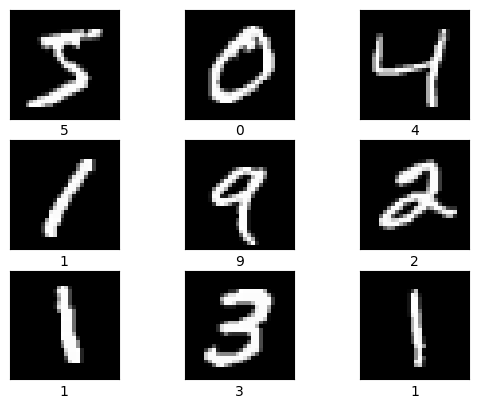

In [4]:
print(y_train.shape)
(60000, 10)
for i in range(9):
 plt.subplot(3, 3, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(x_train[i], cmap='gray')
 plt.xlabel(y_train[i])

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
from keras.models import Sequential
from keras.layers import Dense, Flatten
print(y_train.shape)
(60000, 10, 10)
y_train = y_train[:, 0, :]
y_test = y_test[:, 0, :]
print(y_train.shape)
print(y_test.shape)
(60000, 10)
(10000, 10)
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

(60000, 10, 10)
(60000, 10)
(10000, 10)


In [9]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10,
batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9010 - loss: 0.2808 - val_accuracy: 0.9005 - val_loss: 0.2661
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9040 - loss: 0.2556 - val_accuracy: 0.9005 - val_loss: 0.2386
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8998 - loss: 0.2341 - val_accuracy: 0.9025 - val_loss: 0.2056
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9094 - loss: 0.1985 - val_accuracy: 0.9287 - val_loss: 0.1714
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9337 - loss: 0.1639 - val_accuracy: 0.9328 - val_loss: 0.1480
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9517 - loss: 0.1375 - val_accuracy: 0.9629 - val_loss: 0.1195
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9620 - loss: 0.1183 - val_accuracy: 0.9693 - val_loss: 0.1040
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9666 - loss: 0.1026

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy:, {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.0809
Test accuracy:, 97.44%


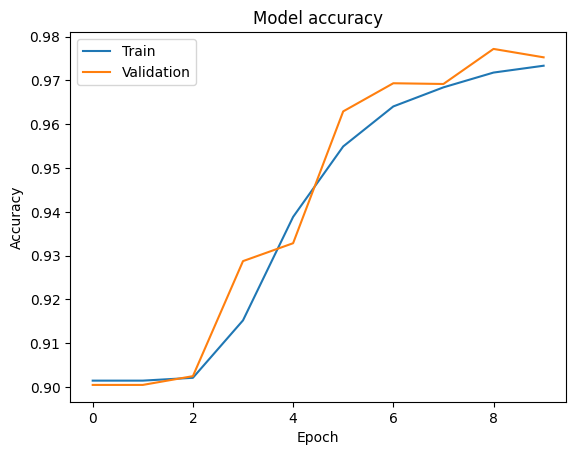

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()